In [58]:
import numpy as np
import pandas as pd
import re
from pathlib import Path
import math
import geopandas as gpd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt

# Investigating demographic variable in the census data (education).

1. Read the Education Demographics Data 

In [59]:
education_demo = pd.read_csv('../can-summer-2023/data/clean/education_demographics.csv')
education_demo

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41...."
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41...."
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243..."
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41...."


In [60]:
population_demo = pd.read_csv('../can-summer-2023/data/clean/population_demographics.csv')
population_demo

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),total population,population density (per sq. mile),total population: male,total population: female,total: under 5 years,total: 5 to 9 years,...,total population: female: 75 to 84 years,total population: female: 85 years and over,total population: white alone,total population: black or african american alone,total population: american indian and alaska native alone,total population: asian alone,total population: native hawaiian and other pacific islander alone,total population: some other race alone,total population: two or more races,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,4059,5233.042,1883,2176,191,402,...,160,26,3230,317,40,0,0,296,176,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,6316,4603.753,3354,2962,384,404,...,138,101,3811,1923,11,52,0,236,283,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,4738,4322.723,2164,2574,321,289,...,111,49,4169,275,0,155,0,0,139,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,5017,9838.490,2551,2466,344,370,...,58,60,4546,78,0,42,0,168,183,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,3750,7442.477,1845,1905,207,430,...,144,60,3184,185,5,71,0,84,221,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,3058,9849.455,1525,1533,12,11,...,38,0,2075,330,0,457,0,46,150,"POLYGON ((-87.627636 41.882057, -87.627594 41...."
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,7952,44222.540,3377,4575,208,306,...,425,109,4729,536,0,1864,0,427,396,"POLYGON ((-87.620855 41.881881, -87.620825 41...."
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,8984,70236.120,4502,4482,258,26,...,32,0,5542,174,0,2757,0,228,283,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243..."
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,5613,24655.630,2697,2916,288,241,...,181,0,3476,276,17,1352,0,102,390,"POLYGON ((-87.617537 41.893453, -87.617164 41...."


In [61]:
#education_demo['master per capita'] = education_demo['population 25 years and over: master\'s degree or more'] / education_demo['population 25 years and over']
#education_demo

In [62]:
education_demo.rename(columns={"population 25 years and over: less than high school": "less than high school",
                              "population 25 years and over: high school graduate or more (includes equivalency)": "high school graduate or more",
                              "population 25 years and over: some college or more": "some college or more",
                              "population 25 years and over: bachelor's degree or more":"bachelor's degree or more",
                              "population 25 years and over: master's degree or more": "master's degree or more",
                              "population 25 years and over: professional school degree or more": "professional school degree or more",
                             "ppopulation 25 years and over: doctorate degree": "doctorate degree"})

,geoid,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,less than high school,high school graduate or more,some college or more,bachelor's degree or more,master's degree or more,professional school degree or more,population 25 years and over: doctorate degree,geometry
0,17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41...."
1,17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...
2,17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6..."
3,17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41...."
4,17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41...."
865,17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41...."
866,17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243..."
867,17031081402,"Census Tract 814.02, Cook County, Illinois",589626,0,4641,99,4542,4364,3994,2519,1388,385,"POLYGON ((-87.617537 41.893453, -87.617164 41...."


## Graphs

Text(0.5, 1.0, 'Percent of People with Master’s Degrees ')

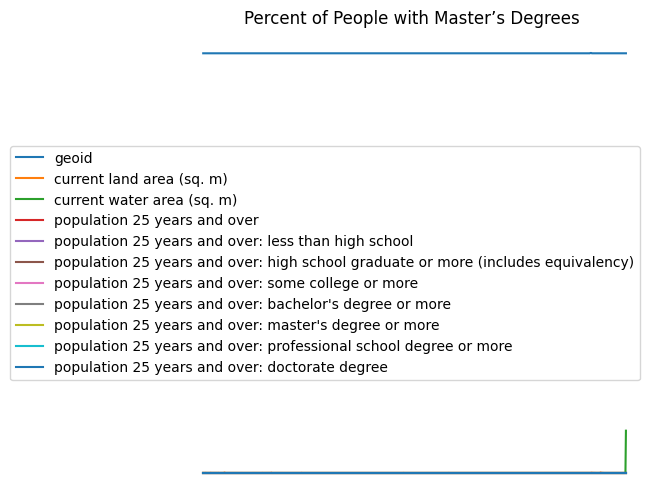

In [63]:
from shapely import wkt
#Converting df to gdf
#new_education['geometry'] = new_education['geometry'].apply(wkt.loads)
#new_education = gpd.GeoDataFrame(new_education, crs="EPSG:4326", geometry=new_education['geometry'])




fig, ax = plt.subplots(1, figsize=(6,6))
education_demo.plot(column = 'master per capita', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Percent of People with Master’s Degrees ', fontdict ={'fontsize': '12', 'fontweight' : '3'})

In [64]:
new_education['High School Degrees per capita'] = new_education['population 25 years and over: high school graduate or more (includes equivalency)'] / new_education['population 25 years and over']
new_education

NameError: name 'new_education' is not defined

In [ ]:
from shapely import wkt
#Converting df to gdf
#new_education['geometry'] = new_education['geometry'].apply(wkt.loads)
#new_education = gpd.GeoDataFrame(new_education, crs="EPSG:4326", geometry= new_education['geometry'])




fig, ax = plt.subplots(1, figsize=(8,6))
new_education.plot(column = 'High School Degrees per capita', legend = True, ax=ax, cmap='plasma')
ax.axis('off')
ax.set_title('Percent of People with High School Degrees', fontdict ={'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Population 25 Years and Over: Doctorate Degree')

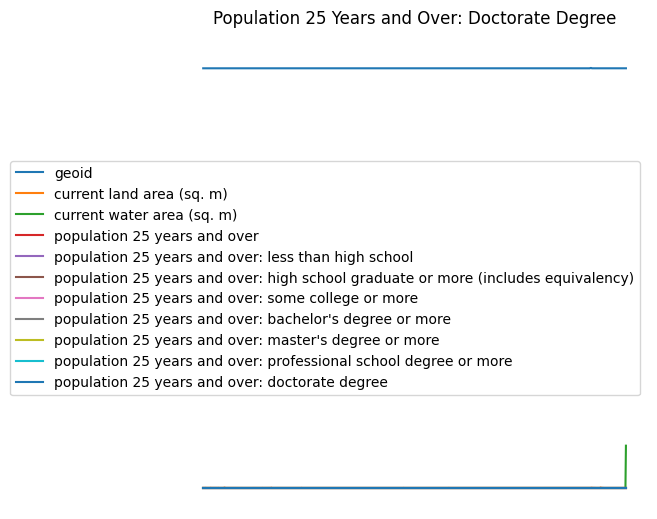

In [65]:
fig, ax = plt.subplots(1, figsize=(6,6))
education_demo.plot(column = 'population 25 years and over: doctorate degree', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Population 25 Years and Over: Doctorate Degree', fontdict = {'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, 'Population 25 Years and Over: High School Graduate or More (includes equivalency)')

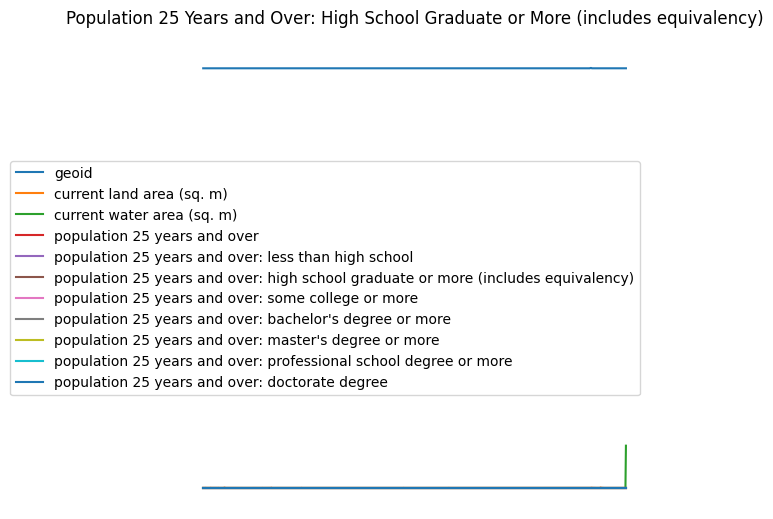

In [66]:
fig, ax = plt.subplots(1, figsize=(6,6))
education_demo.plot(column = 'population 25 years and over: high school graduate or more (includes equivalency)', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Population 25 Years and Over: High School Graduate or More (includes equivalency)', fontdict = {'fontsize': '12', 'fontweight' : '3'})

Text(0.5, 1.0, "Population 25 Years and Over: Master's Degree or More")

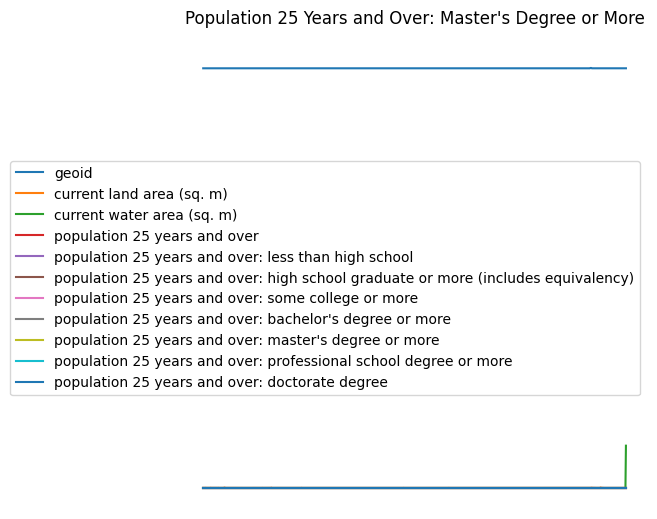

In [67]:
fig, ax = plt.subplots(1, figsize=(6,6))
education_demo.plot(column = 'population 25 years and over: master\'s degree or more', legend = True, ax=ax)
ax.axis('off')
ax.set_title('Population 25 Years and Over: Master\'s Degree or More', fontdict = {'fontsize': '12', 'fontweight' : '3'})

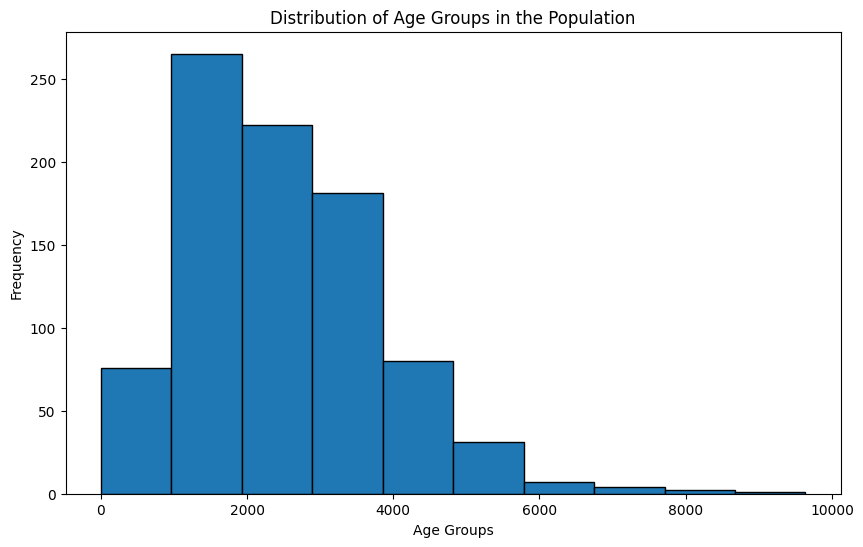

In [68]:
# Plotting the distribution of age groups
plt.figure(figsize=(10, 6))
plt.hist(education_demo['population 25 years and over'], bins=10, edgecolor='black')
plt.xlabel('Age Groups')
plt.ylabel('Frequency')
plt.title('Distribution of Age Groups in the Population')
plt.show()


b.Is there a correlation between age distribution and educational attainment?



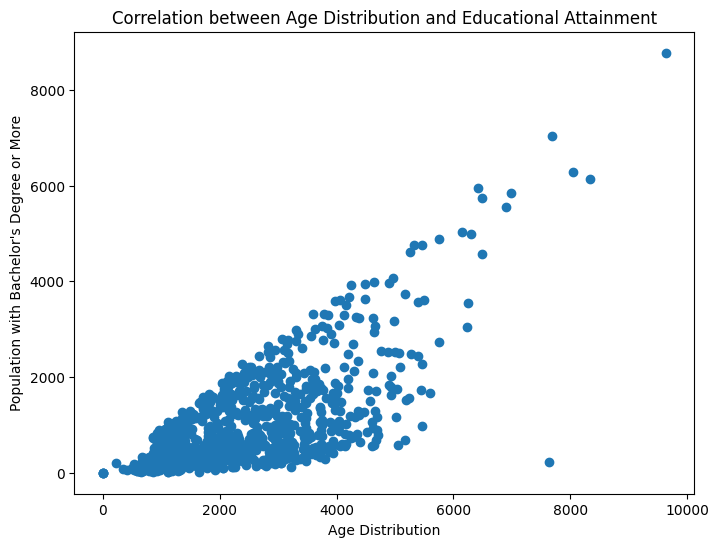

In [69]:
# Scatter plot of age distribution vs. population with bachelor's degree or more
plt.figure(figsize=(8, 6))
plt.scatter(education_demo['population 25 years and over'], education_demo["population 25 years and over: bachelor's degree or more"])
plt.xlabel('Age Distribution')
plt.ylabel('Population with Bachelor\'s Degree or More')
plt.title('Correlation between Age Distribution and Educational Attainment')
plt.show()


In [70]:
correlation = education_demo['population 25 years and over'].corr(education_demo["population 25 years and over: bachelor's degree or more"])
print("Correlation coefficient:", correlation)


Correlation coefficient: 0.6851909670768475


## Making csv file

In [71]:
education_demos_copy = education_demo.copy(deep=True)
education_demos_copy.set_index('geoid',inplace=True)

old_columns = [
 'population 25 years and over: less than high school',
 'population 25 years and over: high school graduate or more (includes equivalency)',
 'population 25 years and over: some college or more',
 'population 25 years and over: bachelor\'s degree or more',
 'population 25 years and over: master\'s degree or more',
 'population 25 years and over: professional school degree or more',
 'population 25 years and over: doctorate degree']

new_columns = ['Percent: 25+ Less Than High School',
 'Percent: 25+ High School or More',
 'Percent: 25+ Some College or More',
 'Percent: 25+ Bachelor\'s Degree or More',
 'Percent: 25+ Master\'s Degree or More',
 'Percent: 25+ Professional School Degree or More',
 'Percent: 25+ Doctorate Degree']

for i in range(1,len(new_columns)+1):
    #print(i)
    education_demos_copy[new_columns[i-1]] = education_demos_copy[old_columns[i-1]]/education_demos_copy['population 25 years and over']

In [72]:
education_demos_copy

,qualifying name,current land area (sq. m),current water area (sq. m),population 25 years and over,population 25 years and over: less than high school,population 25 years and over: high school graduate or more (includes equivalency),population 25 years and over: some college or more,population 25 years and over: bachelor's degree or more,population 25 years and over: master's degree or more,population 25 years and over: professional school degree or more,population 25 years and over: doctorate degree,geometry,Percent: 25+ Less Than High School,Percent: 25+ High School or More,Percent: 25+ Some College or More,Percent: 25+ Bachelor's Degree or More,Percent: 25+ Master's Degree or More,Percent: 25+ Professional School Degree or More,Percent: 25+ Doctorate Degree
geoid,,,,,,,,,,,,,,,,,,,
17031823303,"Census Tract 8233.03, Cook County, Illinois",2008920,0,2783,220,2563,1551,586,201,0,0,"POLYGON ((-87.720963 41.683952, -87.720304 41....",0.079051,0.920949,0.557312,0.210564,0.072224,0.000000,0.000000
17031823304,"Census Tract 8233.04, Cook County, Illinois",3553267,0,4211,459,3752,2365,778,213,129,0,MULTIPOLYGON (((-87.72003618903081 41.68396731...,0.109000,0.891000,0.561624,0.184754,0.050582,0.030634,0.000000
17031740400,"Census Tract 7404, Cook County, Illinois",2838804,0,3110,69,3041,2191,1052,359,42,20,"POLYGON ((-87.72008 41.691274, -87.719372 41.6...",0.022186,0.977814,0.704502,0.338264,0.115434,0.013505,0.006431
17031740300,"Census Tract 7403, Cook County, Illinois",1320728,0,3597,213,3384,2804,1644,768,52,22,"POLYGON ((-87.720431 41.698569, -87.720066 41....",0.059216,0.940784,0.779539,0.457048,0.213511,0.014456,0.006116
17031822802,"Census Tract 8228.02, Cook County, Illinois",1305003,0,2436,191,2245,1818,1096,385,51,41,"MULTIPOLYGON (((-87.720752 41.702042, -87.7207...",0.078407,0.921593,0.746305,0.449918,0.158046,0.020936,0.016831
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17031320400,"Census Tract 3204, Cook County, Illinois",804124,649677,1122,9,1113,1113,1058,685,375,113,"POLYGON ((-87.627636 41.882057, -87.627594 41....",0.008021,0.991979,0.991979,0.942959,0.610517,0.334225,0.100713
17031320101,"Census Tract 3201.01, Cook County, Illinois",465726,25911,6978,246,6732,6519,5835,3672,1244,636,"POLYGON ((-87.620855 41.881881, -87.620825 41....",0.035254,0.964746,0.934222,0.836199,0.526225,0.178275,0.091144
17031081403,"Census Tract 814.03, Cook County, Illinois",331289,1429583,7678,32,7646,7525,7036,3664,1746,280,"MULTIPOLYGON (((-87.624311 41.889115, -87.6243...",0.004168,0.995832,0.980073,0.916384,0.477208,0.227403,0.036468


In [73]:
education_demos = education_demos_copy[[
                                        'qualifying name',
                                        'population 25 years and over',
                                        'Percent: 25+ Less Than High School',
                                         'Percent: 25+ High School or More',
                                         'Percent: 25+ Some College or More',
                                         'Percent: 25+ Bachelor\'s Degree or More',
                                         'Percent: 25+ Master\'s Degree or More',
                                         'Percent: 25+ Professional School Degree or More',
                                         'Percent: 25+ Doctorate Degree']]
education_demos.head(2)

,qualifying name,population 25 years and over,Percent: 25+ Less Than High School,Percent: 25+ High School or More,Percent: 25+ Some College or More,Percent: 25+ Bachelor's Degree or More,Percent: 25+ Master's Degree or More,Percent: 25+ Professional School Degree or More,Percent: 25+ Doctorate Degree
geoid,,,,,,,,,
17031823303,"Census Tract 8233.03, Cook County, Illinois",2783,0.079051,0.920949,0.557312,0.210564,0.072224,0.000000,0.0
17031823304,"Census Tract 8233.04, Cook County, Illinois",4211,0.109000,0.891000,0.561624,0.184754,0.050582,0.030634,0.0


In [77]:
education_demos['Percent Overlap'] = 0.1
education_demos.head(1)

/tmp/ipykernel_1704054/233312977.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  education_demos['Percent Overlap'] = 0.1


,qualifying name,population 25 years and over,Percent: 25+ Less Than High School,Percent: 25+ High School or More,Percent: 25+ Some College or More,Percent: 25+ Bachelor's Degree or More,Percent: 25+ Master's Degree or More,Percent: 25+ Professional School Degree or More,Percent: 25+ Doctorate Degree,Percent Overlap
geoid,,,,,,,,,,
17031823303,"Census Tract 8233.03, Cook County, Illinois",2783,0.079051,0.920949,0.557312,0.210564,0.072224,0.0,0.0,0.1


In [93]:
pop_in_branch = (education_demos['Percent Overlap']  * education_demos['population 25 years and over']).sum()
Branch_pop_Bachelors = (education_demos['Percent Overlap'] * education_demos['Percent: 25+ Bachelor\'s Degree or More'] * education_demos['population 25 years and over']).sum()
pop_in_branch 

216195.90000000002

In [95]:
Branch_pop_Bachelors/pop_in_branch

0.4062038179262419

In [113]:
def Education_by_branch(DemographicsVariables):
    """ This function takes the population of each variables and devide it by the population to give us the perecntage of how many people have a specific degree in the overlapping area of the branch"""
    pop_in_branch = (education_demos['Percent Overlap']  * education_demos['population 25 years and over']).sum()
    Branch_pop_Var = (education_demos['Percent Overlap'] * education_demos[DemographicsVariables] * education_demos['population 25 years and over']).sum()
    result = Branch_pop_Var/pop_in_branch
    return result
Education_by_branch('Percent: 25+ Bachelor\'s Degree or More')

0.4062038179262419

In [75]:
education_demos.to_csv('../can-summer-2023/data/extra_data/education_demos.csv')